<a href="https://colab.research.google.com/github/PaarthBarkur1/Portfolio-optimization/blob/main/financeproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#stock bucket
# large cap : Tech('TCS.NS') Energy('RELIANCE.NS') Finance('HDFCBANK.NS') Healthcare('SUNPHARMA.NS') Industrials('LT.NS') Real Estate('DLF.NS')
# mid cap : Tech('SILVERTUC.NS') Energy('SBC.NS') Finance('PRIMESECU.NS') Healthcare('SASTASUNDR.NS') Industrials('STCINDIA.NS') Real estate('PARSVNATH.NS')
# small cap: Tech('MRO-TEK.NS') Energy('ANMOL.NS') Finance('INDBANK.NS') Healthcare('MANGALAM.NS') Industrials('GAYAPROJ.NS') Real Estate('AMJLAND.NS')
# Wildcard: 'SOMATEX.NS' 'SBIN.NS' Reason: Aise hi sexy lagg raha tha

In [ ]:
stockbucket = ['TCS.NS','RELIANCE.NS','HDFCBANK.NS','SUNPHARMA.NS','LT.NS','DLF.NS','SILVERTUC.NS','SBC.NS','PRIMESECU.NS','SASTASUNDR.NS','STCINDIA.NS','PARSVNATH.NS','MRO-TEK.NS','ANMOL.NS','INDBANK.NS','MANGALAM.NS','GAYAPROJ.NS','AMJLAND.NS','SOMATEX.NS','SBIN.NS']


We take the max years , 5 years and 1 year time frame to calculate the monthly, weekly and daily return.

In [ ]:

def sampler(data):
  datanew =[]
  for i in range(1,len(data)):
    datanew.append((data.iloc[i]['Close'] - data.iloc[i-1]['Close'])/(data.iloc[i-1]['Close'])*100)
  datanew = pd.Series(datanew)
  std = datanew.std()
  mean = datanew.mean()
  dic = dict()
  dic['std'] = std
  dic['mean'] = mean
  dic['data'] = datanew
  return dic


def pipeline(tag):
  dicti = dict()
  data=yfinance.Ticker(tag)
  dicti['mon_max']=sampler(data.history(period='max',interval = '1mo'))
  dicti['mon_5']= sampler(data.history(period='5y',interval = '1mo'))
  dicti['mon_1']=sampler(data.history(period='1y',interval = '1mo'))
  dicti['week_max']=sampler(data.history(period='max',interval='1wk'))
  dicti['week_5']=sampler(data.history(period='5y',interval='1wk'))
  dicti['week_1']=sampler(data.history(period='1y',interval='1wk'))
  dicti['day_max']=sampler(data.history(period='max',interval='1d'))
  dicti['day_5']=sampler(data.history(period='5y',interval='1d'))
  dicti['day_1']=sampler(data.history(period='1y',interval='1d'))
  return dicti


In [ ]:
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
dicti = dict()
for i in tqdm(stockbucket):
    dicti[i] = pipeline(i)
print(dicti)

100%|██████████| 20/20 [01:09<00:00,  3.46s/it]

{'TCS.NS': {'mon_max': {'std': 10.269912224207122, 'mean': 2.360030169946722, 'data': 0       0.741781
1      14.591667
2      40.449787
3     -19.338763
4      -0.902286
         ...    
260     7.125568
261    12.325363
262     4.081230
263    -6.264076
264    -3.171876
Length: 265, dtype: float64}, 'mon_5': {'std': 6.0673381150228405, 'mean': 1.5200713101313428, 'data': 0      5.281901
1     -3.823385
2     -3.576548
3     -8.701850
4     11.120326
5     -2.089881
6      5.566946
7      9.891502
8     -0.836590
9     10.413108
10     6.923314
11     0.984110
12     6.832977
13     8.683961
14    -6.799060
15     9.796856
16    -4.474732
17     4.068331
18     6.424702
19    -5.329151
20    19.803424
21    -0.287876
22   -10.006500
23     4.066561
24     5.927787
25    -0.056171
26    -4.705374
27     5.226212
28    -5.167174
29    -5.141407
30    -2.236458
31     1.065136
32    -2.491701
33    -6.433823
34     6.277125
35     6.464645
36    -3.954826
37     3.132020
38     0.632901


In [ ]:
a = dicti['TCS.NS']
a

{'mon_max': {'std': 10.269912224207122,
  'mean': 2.360030169946722,
  'data': 0       0.741781
  1      14.591667
  2      40.449787
  3     -19.338763
  4      -0.902286
           ...    
  260     7.125568
  261    12.325363
  262     4.081230
  263    -6.264076
  264    -3.171876
  Length: 265, dtype: float64},
 'mon_5': {'std': 6.0673381150228405,
  'mean': 1.5200713101313428,
  'data': 0      5.281901
  1     -3.823385
  2     -3.576548
  3     -8.701850
  4     11.120326
  5     -2.089881
  6      5.566946
  7      9.891502
  8     -0.836590
  9     10.413108
  10     6.923314
  11     0.984110
  12     6.832977
  13     8.683961
  14    -6.799060
  15     9.796856
  16    -4.474732
  17     4.068331
  18     6.424702
  19    -5.329151
  20    19.803424
  21    -0.287876
  22   -10.006500
  23     4.066561
  24     5.927787
  25    -0.056171
  26    -4.705374
  27     5.226212
  28    -5.167174
  29    -5.141407
  30    -2.236458
  31     1.065136
  32    -2.491701
  33    -6.4

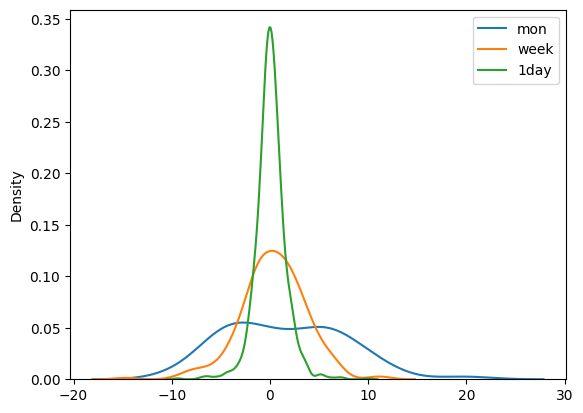

In [ ]:
import seaborn as sns

data = a['mon_5']['data']
data1 = a['week_5']['data']
data2 = a['day_5']['data']
sns.kdeplot(data,label='mon')
sns.kdeplot(data1,label ='week')
sns.kdeplot(data2,label='1day')
plt.legend()
plt.show()



In [ ]:
tab=pd.DataFrame()
for i in stockbucket:
  tab[i]=dicti[i]['mon_1']['data']
tab.corr()

,TCS.NS,RELIANCE.NS,HDFCBANK.NS,SUNPHARMA.NS,LT.NS,DLF.NS,SILVERTUC.NS,SBC.NS,PRIMESECU.NS,SASTASUNDR.NS,STCINDIA.NS,PARSVNATH.NS,MRO-TEK.NS,ANMOL.NS,INDBANK.NS,MANGALAM.NS,GAYAPROJ.NS,AMJLAND.NS,SOMATEX.NS,SBIN.NS
TCS.NS,1.000000,0.349809,0.014137,0.518430,0.320952,0.536798,0.163197,-0.204497,0.362327,-0.090697,0.619764,0.113766,0.392635,0.453118,0.291964,0.543987,0.360703,0.509951,-0.135088,0.427614
RELIANCE.NS,0.349809,1.000000,0.096326,0.322986,0.152996,0.514964,-0.263530,0.140240,-0.425023,0.023362,0.268934,0.256481,0.064653,0.106404,0.561787,0.147496,-0.189185,-0.156028,-0.075916,0.199974
HDFCBANK.NS,0.014137,0.096326,1.000000,-0.513398,0.149338,-0.143785,-0.151946,-0.343233,-0.367854,0.157416,-0.170809,-0.687506,-0.263561,0.169352,-0.172508,-0.281906,0.170382,-0.119852,0.228108,0.131635
SUNPHARMA.NS,0.518430,0.322986,-0.513398,1.000000,0.200010,0.591480,-0.203074,-0.129252,0.124094,-0.323029,0.277231,0.597037,0.268854,-0.089861,0.059242,0.322442,0.213424,0.081035,0.157180,-0.095950
LT.NS,0.320952,0.152996,0.149338,0.200010,1.000000,0.446192,0.132890,-0.231562,0.022644,-0.619795,0.295585,-0.099011,-0.262529,-0.003073,0.062136,-0.361552,0.641812,0.198363,0.333384,0.243930
DLF.NS,0.536798,0.514964,-0.143785,0.591480,0.446192,1.000000,-0.030996,-0.048400,-0.307986,-0.473453,0.446092,0.290923,0.090651,0.246641,0.549313,0.284981,0.423815,0.071052,0.341216,0.545952
SILVERTUC.NS,0.163197,-0.263530,-0.151946,-0.203074,0.132890,-0.030996,1.000000,0.473822,0.192749,-0.091761,0.389673,-0.262106,0.236083,0.166537,0.150914,0.470438,0.446766,0.441601,-0.274918,0.268548
SBC.NS,-0.204497,0.140240,-0.343233,-0.129252,-0.231562,-0.048400,0.473822,1.000000,-0.113178,0.245315,0.393889,0.393685,0.247831,0.108373,0.568019,0.452766,-0.262179,0.272918,-0.557310,-0.247972
PRIMESECU.NS,0.362327,-0.425023,-0.367854,0.124094,0.022644,-0.307986,0.192749,-0.113178,1.000000,0.236029,0.296957,0.264535,0.131069,0.312673,-0.148208,0.137741,0.057183,0.598576,-0.554702,-0.178245
SASTASUNDR.NS,-0.090697,0.023362,0.157416,-0.323029,-0.619795,-0.473453,-0.091761,0.245315,0.236029,1.000000,0.225420,0.198934,-0.232434,0.320625,0.215096,0.148558,-0.494970,0.353719,-0.730635,-0.336109


In [ ]:
tab.cov()

,TCS.NS,RELIANCE.NS,HDFCBANK.NS,SUNPHARMA.NS,LT.NS,DLF.NS,SILVERTUC.NS,SBC.NS,PRIMESECU.NS,SASTASUNDR.NS,STCINDIA.NS,PARSVNATH.NS,MRO-TEK.NS,ANMOL.NS,INDBANK.NS,MANGALAM.NS,GAYAPROJ.NS,AMJLAND.NS,SOMATEX.NS,SBIN.NS
TCS.NS,41.148755,13.252987,0.661459,21.437510,12.104496,26.377893,6.659107,-24.954085,24.925070,-4.380273,80.747341,12.987938,38.942319,25.211835,26.284133,38.673204,54.100367,42.908363,-11.026330,19.396292
RELIANCE.NS,13.252987,34.882664,4.149630,12.296848,5.312685,23.298746,-9.900610,15.756296,-26.919946,1.038821,32.260660,26.959401,5.903989,5.451018,46.565281,9.654485,-26.125417,-12.087684,-5.705264,8.351563
HDFCBANK.NS,0.661459,4.149630,53.201228,-24.139073,6.404114,-8.033905,-7.049792,-47.624050,-28.773571,8.644531,-25.304402,-89.245731,-29.723209,10.714333,-17.658580,-22.788147,29.057396,-11.466786,21.170770,6.789240
SUNPHARMA.NS,21.437510,12.296848,-24.139073,41.553832,7.580300,29.207642,-8.326958,-15.849609,8.578564,-15.677511,36.297024,68.494718,26.796408,-5.024484,5.359462,23.035631,32.167719,6.851971,12.892552,-4.373604
LT.NS,12.104496,5.312685,6.404114,7.580300,34.566633,20.095637,4.969883,-25.898373,1.427700,-27.435158,35.296713,-10.360061,-23.864958,-0.156689,5.126928,-23.558256,88.228461,15.297637,24.940720,10.141052
DLF.NS,26.377893,23.298746,-8.033905,29.207642,20.095637,58.681663,-1.510370,-7.052912,-25.301076,-27.306023,69.406302,39.662438,10.736877,16.388180,59.055037,24.194179,75.910107,7.139442,33.259521,29.572920
SILVERTUC.NS,6.659107,-9.900610,-7.049792,-8.326958,4.969883,-1.510370,40.462514,57.334649,13.148465,-4.394564,50.344242,-29.672439,23.219071,9.188631,13.472285,33.164389,66.447590,36.846067,-22.251834,12.079183
SBC.NS,-24.954085,15.756296,-47.624050,-15.849609,-25.898373,-7.052912,57.334649,361.869341,-23.088410,35.134290,152.185428,133.283129,72.893026,17.881782,151.643704,95.453734,-116.612770,68.099294,-134.898877,-33.355454
PRIMESECU.NS,24.925070,-26.919946,-28.773571,8.578564,1.427700,-25.301076,13.148465,-23.088410,115.004228,19.056909,64.680533,50.488234,21.732614,29.084532,-22.305669,16.370498,14.338249,84.199810,-75.692412,-13.516424
SASTASUNDR.NS,-4.380273,1.038821,8.644531,-15.677511,-27.435158,-27.306023,-4.394564,35.134290,19.056909,56.684120,34.470433,26.655611,-27.057321,20.938387,22.727367,12.395707,-87.132917,34.932014,-69.994981,-17.893684


In [ ]:
import random
def combi(stockbucket):
  r = [random.randrange(1000) for i in range(1,21)]
  s = sum(r)
  r = [ i/s for i in r ]

  combo={}
  j=0
  for i in stockbucket:
    combo[i] = r[j]
    j+=1
  return combo

In [ ]:

def avgret(combo,dicti):
  sum =0
  for i in dicti.keys():
    sum+= float(combo[i]*dicti[i]['mon_5']['mean'])
  return(sum)

def avgrisk(combo,dicti,cov,stockbucket):
  sum = 0
  for i in range(len(stockbucket)):
    sum+= (combo[stockbucket[i]]**2) * dicti[stockbucket[i]]['mon_5']['std']**2
    for j in range(i+1,len(stockbucket)):
      sum+= 2*combo[stockbucket[i]]*combo[stockbucket[j]]*cov[stockbucket[i]][stockbucket[j]]

  return(sum)

In [ ]:
cov_matrix = tab.cov()
def riskregulator(risk,expectedrisk,c):
  a=[]
  for i in range(len(stockbucket)):
    a.append(2* np.multiply(c ,np.array(cov_matrix[stockbucket[i]])).sum()/(risk * ((expectedrisk - risk)**3)))
  return np.array(a)

In [ ]:

def simulate(i, stockbucket, dicti, cov_matrix):
    combo = combi(stockbucket)
    avgre = avgret(combo, dicti)
    avgris = avgrisk(combo, dicti, cov_matrix, stockbucket)

    return avgre, avgris, combo


tally = pd.DataFrame(columns=['return', 'risk', 'combo'])
#maxss=0
with ThreadPoolExecutor(50) as executor:
    futures = [executor.submit(simulate, i, stockbucket, dicti, cov_matrix) for i in range(100000)]
    for future in tqdm(as_completed(futures), total=100000):
        avgre, avgris, combo = future.result()
        tally.loc[len(tally)] = [avgre, avgris,combo]



100%|██████████| 100000/100000 [09:25<00:00, 176.79it/s]


In [ ]:
rfrr = input("risk free rate of return")
index = 'nifty50'
nsedata=yfinance.Ticker(i)
dicti[index]=sampler(nsedata.history(period='5y',interval = '1mo'))

tally['Sharpe']  = (tally['return'] - float(rfrr))/np.sqrt(tally['risk'])
tally = tally.sort_values(by='Sharpe',ascending=False)
tally.head()
dicti[index]['Sharpe'] = (dicti[index]['mean'] - float(rfrr))/np.sqrt(dicti[index]['std'])
print("For Nifty 50 the Sharpe ratio is ",dicti[index]['Sharpe']," Mean monthly return is ", dicti[index]['mean'], " std is ",dicti[index]['std'])
tally.head()

risk free rate of return1.1
For Nifty 50 the Sharpe ratio is  0.3246719048454497  Mean monthly return is  2.164360682825223  std is  10.747024251305305


,return,risk,combo,Sharpe
96751,3.679861,19.714941,"{'TCS.NS': 0.023649728347714925, 'RELIANCE.NS'...",0.581030
60192,3.885288,23.153741,"{'TCS.NS': 0.02761942205622174, 'RELIANCE.NS':...",0.578841
45117,4.060363,26.275301,"{'TCS.NS': 0.032761471682513435, 'RELIANCE.NS'...",0.577525
32274,4.167753,28.559243,"{'TCS.NS': 0.003433279926756695, 'RELIANCE.NS'...",0.574047
81330,4.032780,26.502501,"{'TCS.NS': 0.10025188916876575, 'RELIANCE.NS':...",0.569687


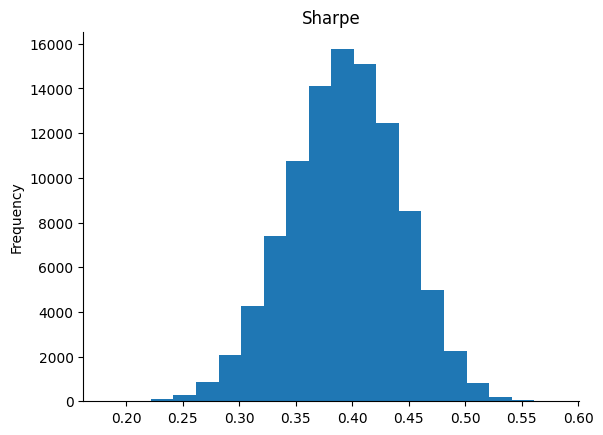

In [ ]:
# @title Sharpe

from matplotlib import pyplot as plt
tally['Sharpe'].plot(kind='hist', bins=20, title='Sharpe')
plt.gca().spines[['top', 'right',]].set_visible(False)

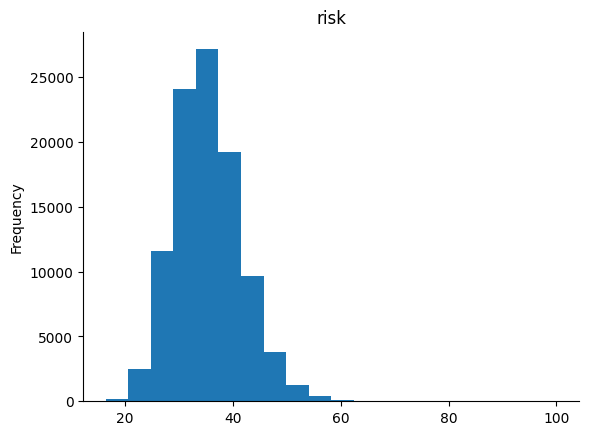

In [ ]:
# @title risk

from matplotlib import pyplot as plt
tally['risk'].plot(kind='hist', bins=20, title='risk')
plt.gca().spines[['top', 'right',]].set_visible(False)

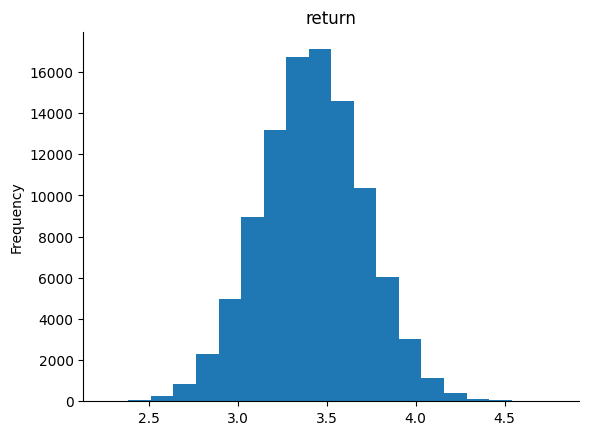

In [ ]:
# @title return

from matplotlib import pyplot as plt
tally['return'].plot(kind='hist', bins=20, title='return')
plt.gca().spines[['top', 'right',]].set_visible(False)

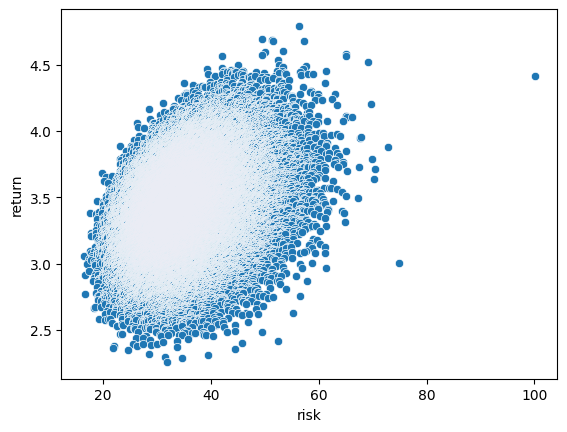

In [ ]:
import seaborn as sns
sns.scatterplot(x=tally['risk'],y=tally['return'])
plt.show()

In [ ]:
for i in stockbucket:
  dicti[i]['beta'] = dicti[i]['mon_5'],

{'TCS.NS': {'mon_max': {'std': 10.269912224207122,
   'mean': 2.360030169946722,
   'data': 0       0.741781
   1      14.591667
   2      40.449787
   3     -19.338763
   4      -0.902286
            ...    
   260     7.125568
   261    12.325363
   262     4.081230
   263    -6.264076
   264    -3.171876
   Length: 265, dtype: float64},
  'mon_5': {'std': 6.0673381150228405,
   'mean': 1.5200713101313428,
   'data': 0      5.281901
   1     -3.823385
   2     -3.576548
   3     -8.701850
   4     11.120326
   5     -2.089881
   6      5.566946
   7      9.891502
   8     -0.836590
   9     10.413108
   10     6.923314
   11     0.984110
   12     6.832977
   13     8.683961
   14    -6.799060
   15     9.796856
   16    -4.474732
   17     4.068331
   18     6.424702
   19    -5.329151
   20    19.803424
   21    -0.287876
   22   -10.006500
   23     4.066561
   24     5.927787
   25    -0.056171
   26    -4.705374
   27     5.226212
   28    -5.167174
   29    -5.141407
   30    -

##Gradient Ascent Experimental

In [ ]:
s = np.array(list(dicti[i]['mon_5']['mean'] for i in stockbucket))
s

In [ ]:
stockbucket

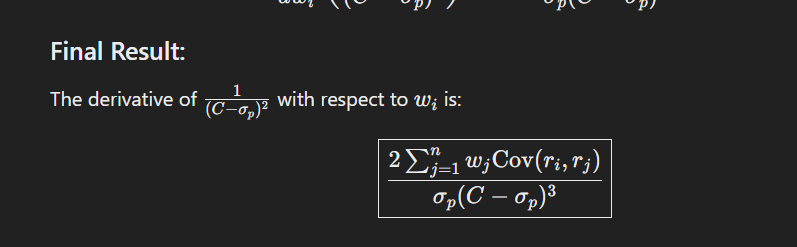

In [ ]:
# next step is interesting we use gradient ascent instead of decent.
# also the sum of all weights should add upto 1 will serve as a regularizer
# loss function is the average rate of return which needs to be maximized while keeping the risk fixed.
# we us the 1/(expectedrisk - actualrisk)**2 as a regulaization term in the loss function so that it gives us only the actual risk return.
expectedrisk= float(input("Expected Risk (20-80))"))
c = np.array(list(combi(stockbucket).values()))
interations = 100
learning_rate=0.01
#b=0.9
def convert(c,stockbucket):
  combo={}
  j=0
  for i in stockbucket:
    combo[i] = c[j]

    j+=1
  return combo
v=0
for i in range(interations):
  combo = convert(c,stockbucket)
  returns = avgret(combo,dicti)
  risk= avgrisk(combo,dicti,cov_matrix ,stockbucket)
  regterm = riskregulator(risk,expectedrisk,c)
  print(returns)
  gradient = s + regterm
  #v = b * v + learning_rate * gradient
  c += learning_rate * gradient

  C= np.maximum(c, 0)
  c = c/c.sum()
c

In [ ]:
3.3344874997257574- 3.334487499725756

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Example average returns for 20 stocks (replace with actual data)
average_returns = np.array(list([dicti[i]['mon_5']['mean']] for i in stockbucket))  # Replace with actual average returns

# Objective function to maximize (negative because we use a minimizer)
def objective(weights):
    return -np.dot(weights, average_returns)

# Constraint: Sum of weights must be 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: Each weight must be between 0 and 1
bounds = [(0, 1) for _ in range(len(average_returns))]

# Initial guess (equal weights)
initial_guess = np.array([1/len(average_returns)] * len(average_returns))

# Perform the optimization
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = result.x

# Print the results
print("Optimal Weights:", optimal_weights)
print("Sum of Weights:", np.sum(optimal_weights))
print("Expected Portfolio Return:", -result.fun)